In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

In [41]:
# Read the CSV file with ";" as the delimiter
df = pd.read_csv("/kaggle/input/bank-csv/bank.csv", delimiter=";")
# Remove double quotes from column names
df.columns = df.columns.str.replace('"', '')
# Remove double quotes from values
df = df.map(lambda x: x.replace('"', '') if isinstance(x, str) else x)

In [8]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


EDA



Categorical columns exploration



In the dataset we have both categorical and numerical columns. Let's look at the values of categorical columns first.

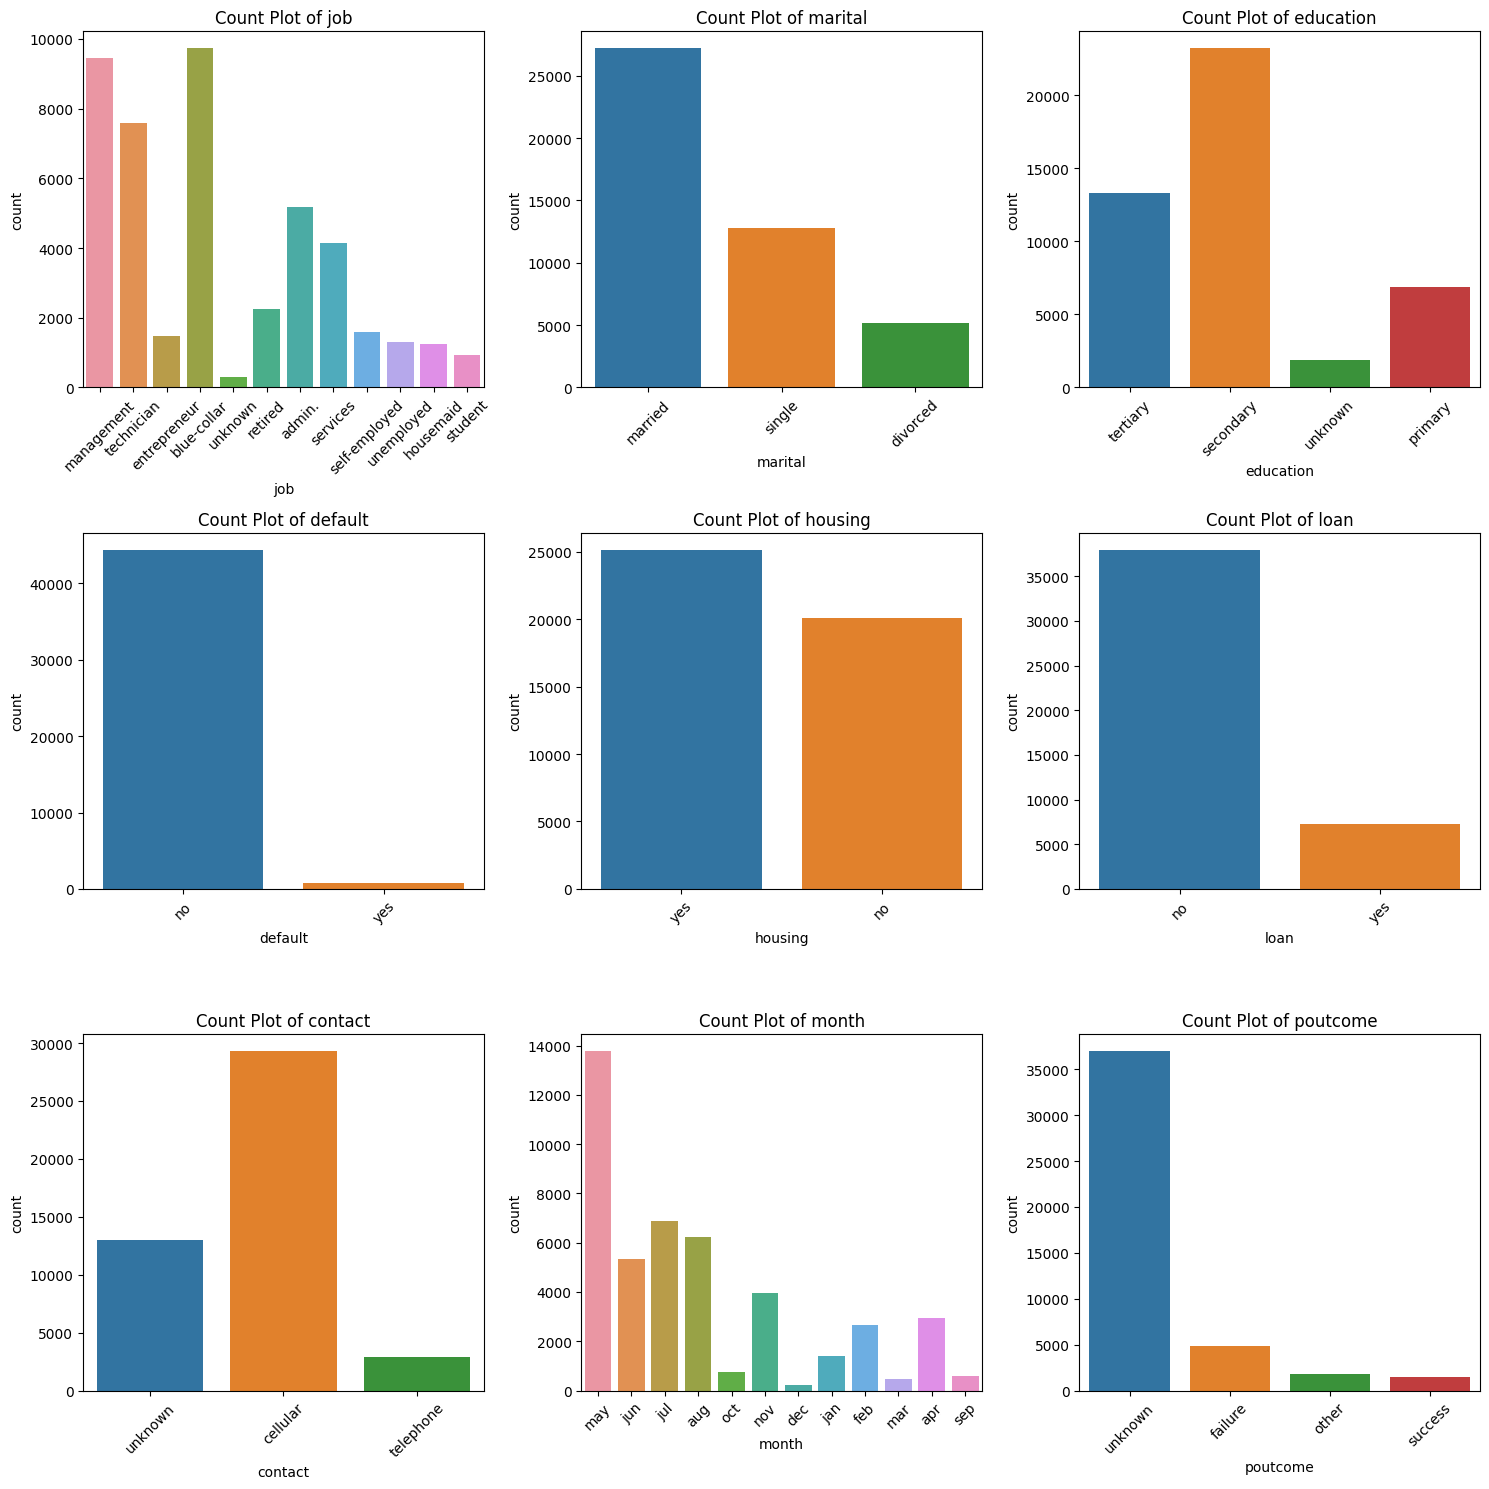

In [6]:
# Define categorical columns and set up the plot grid
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
fig, axes = plt.subplots((len(cat_columns) + 2) // 3, 3, figsize=(15, 15))

# Plot each column in a loop
for ax, col in zip(axes.flat, cat_columns):
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for ax in axes.flat[len(cat_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

Numerical columns exploration



Now let's look at the numerical columns' values. The most convenient way to look at the numerical values is plotting histograms.

/tmp/ipykernel_31/2945461511.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



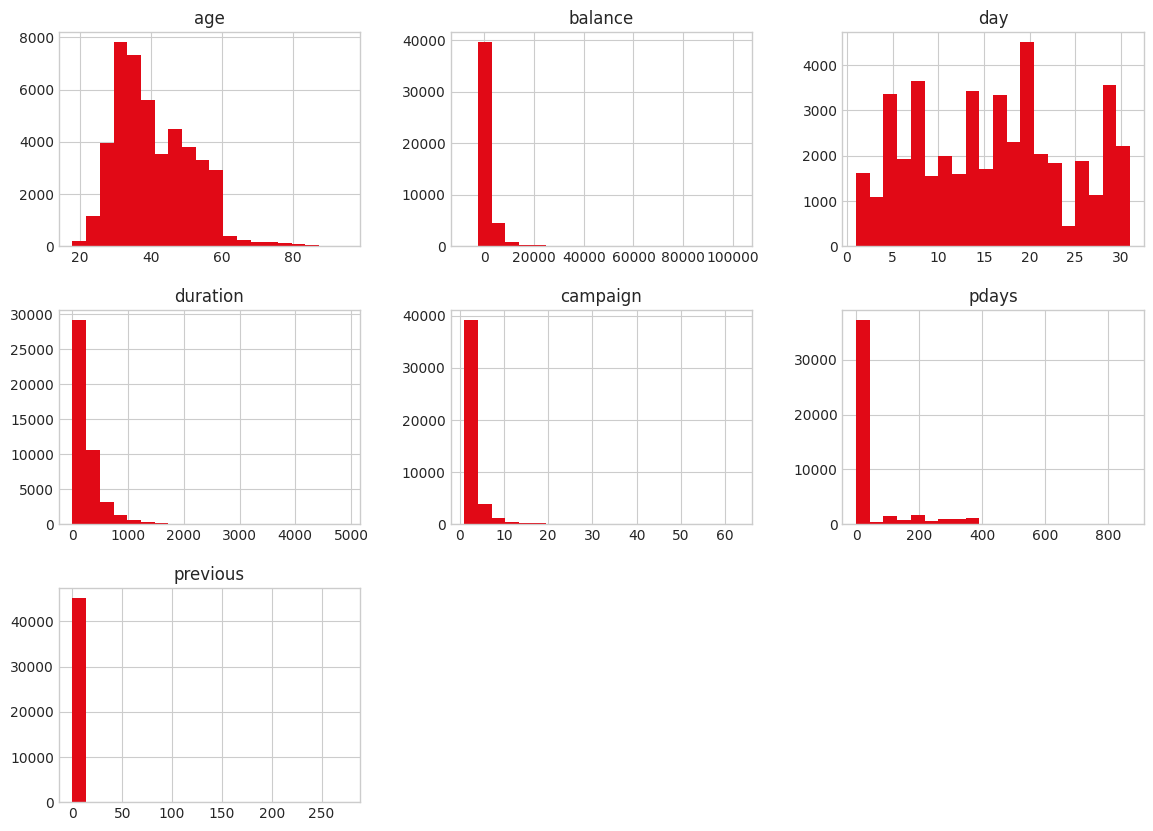

In [7]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='#E10916')
plt.show()

We can see that some numerical columns have outliers (especially 'pdays'). we will analyse outliers later.

Analysis of the response column

<Axes: title={'center': 'Deposit value counts'}, xlabel='y'>

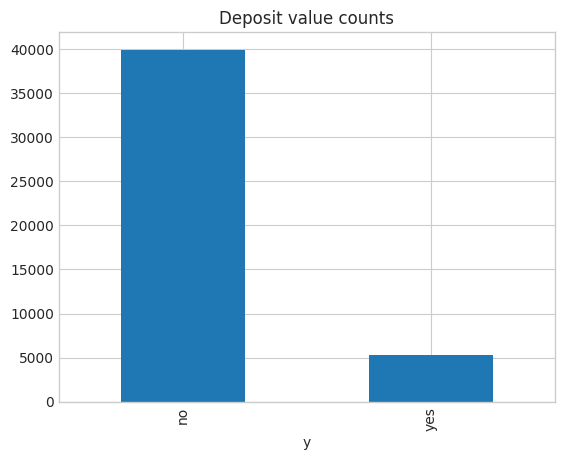

In [8]:
value_counts = df['y'].value_counts()
value_counts.plot.bar(title = 'Deposit value counts')

Correlations

Analysis by Occupation:



Number of Occupations: Management is the occupation that is more prevalent in this dataset.



Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.



Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.

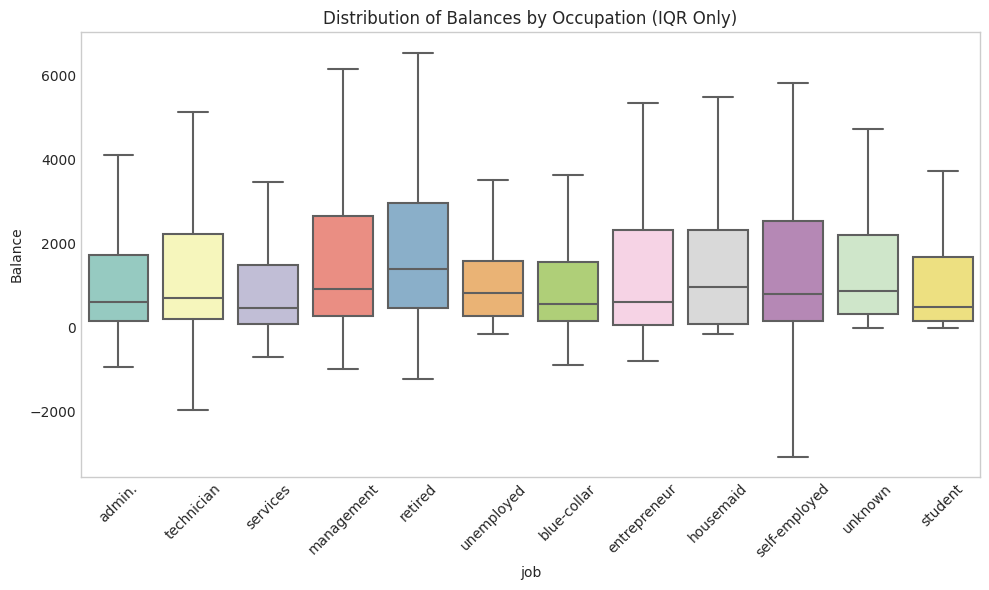

In [11]:
# Filter the dataframe
subscribed_df = df[df["y"] == "yes"]

# Create the box plot for balances by job
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='balance', data=suscribed_df, palette='Set3', showfliers=False)

# Set title and labels
plt.title('Distribution of Balances by Occupation (IQR Only)')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


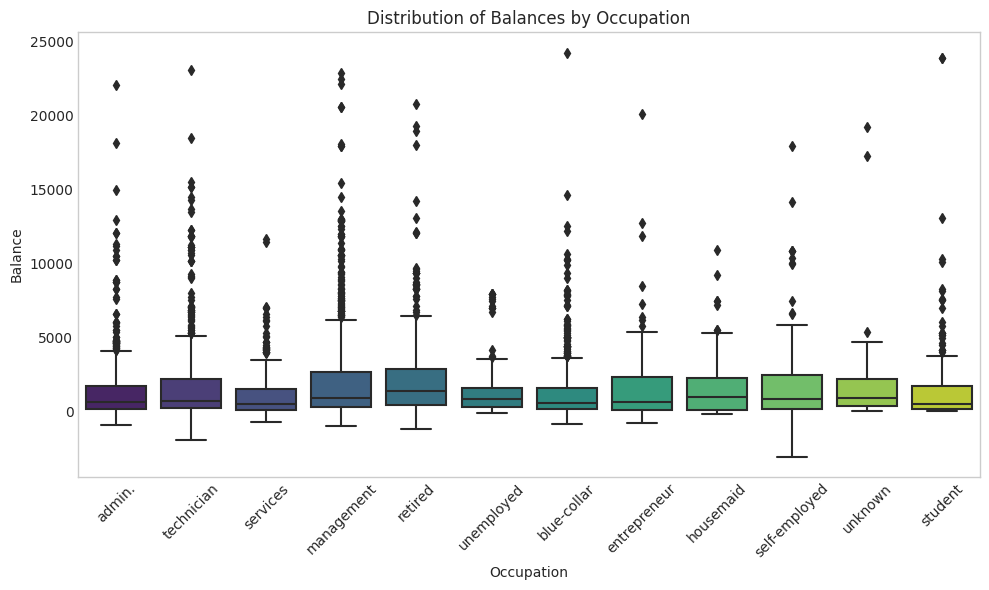

In [12]:
# Filter for balances up to 25,000 (Deleting far outliers for a better illustration of the plot)
subscribed_df = subscribed_df[subscribed_df["balance"] <= 25000]

# Create a box plot for balances grouped by occupations
plt.figure(figsize=(10, 6))
sns.boxplot(data=subscribed_df, x='job', y='balance', palette='viridis')

plt.title('Distribution of Balances by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Balance')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x labels for better readability
# Show the plot
plt.tight_layout()
plt.show()

Marital Status



Well in this analysis we didn't find any significant insights other than most divorced individuals are broke. No wonder since they have to split financial assets! Nevertheless, since no further insights have been found we will proceed to clustering marital status with education status. Let's see if we can find other groups of people in the sample population.

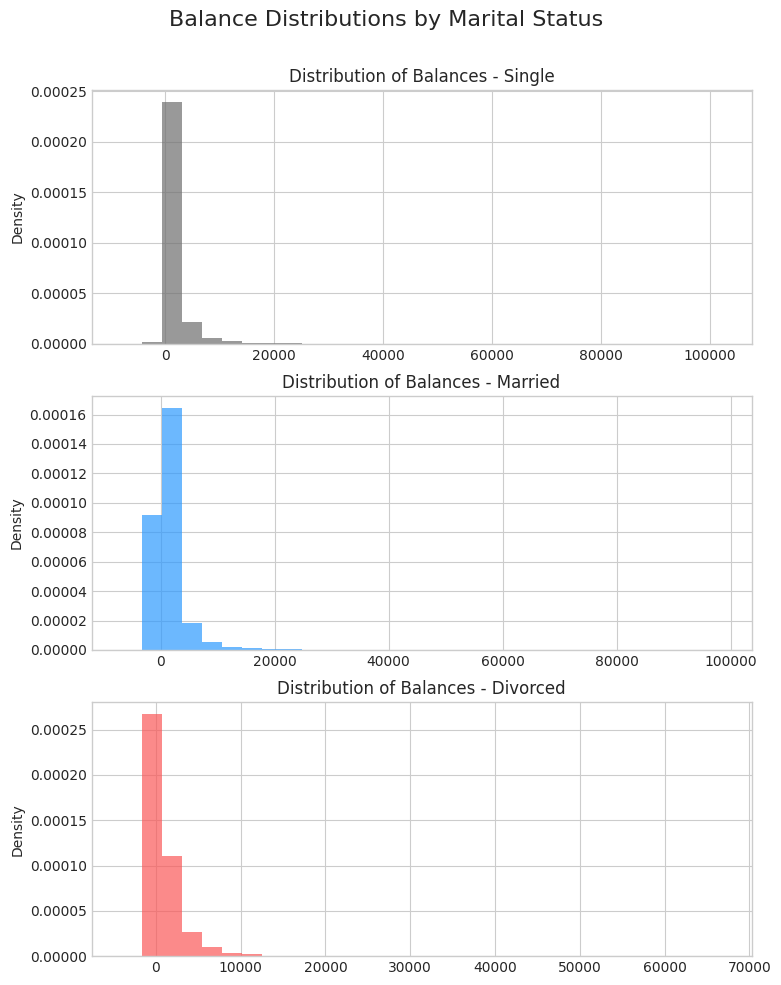

In [13]:
# Extract balances by marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values

# Create subplots for each marital status
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Plot histograms
axes[0].hist(single, bins=30, density=True, color='#6E6E6E', alpha=0.7)
axes[0].set_title('Distribution of Balances - Single')
axes[0].set_ylabel('Density')

axes[1].hist(married, bins=30, density=True, color='#2E9AFE', alpha=0.7)
axes[1].set_title('Distribution of Balances - Married')
axes[1].set_ylabel('Density')

axes[2].hist(divorced, bins=30, density=True, color='#FA5858', alpha=0.7)
axes[2].set_title('Distribution of Balances - Divorced')
axes[2].set_ylabel('Density')

# Update layout
plt.tight_layout()
plt.suptitle("Balance Distributions by Marital Status", fontsize=16)
plt.subplots_adjust(top=0.9)

# Show the plot
plt.show()

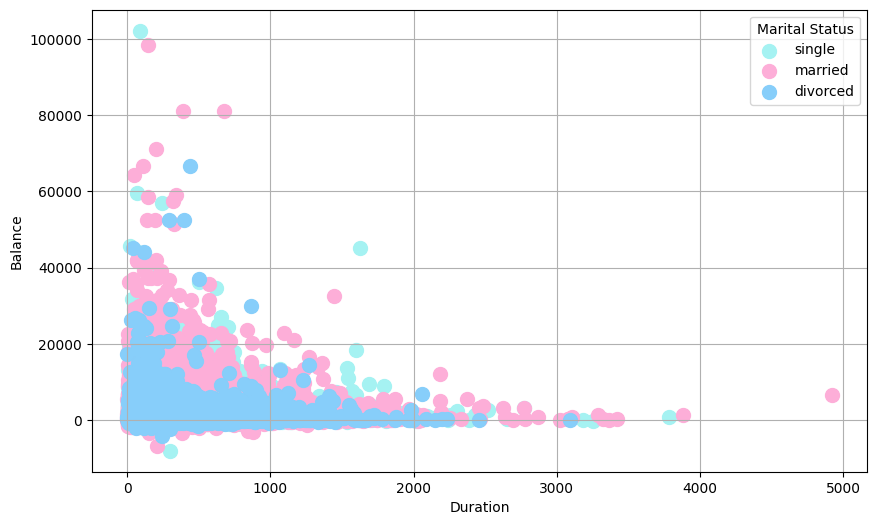

In [12]:
# Notice how divorced have a considerably low amount of balance.
# Define colors
colors = {
    'single': (165/255, 242/255, 242/255),
    'married': (253/255, 174/255, 216/255),
    'divorced': (135/255, 206/255, 250/255) 
}

# Create scatter plot
plt.figure(figsize=(10, 6))
for status, color in colors.items():
    subset = df[df['marital'] == status]
    plt.scatter(subset['duration'], subset['balance'], label=status, color=color, s=100)

# Customize and display
plt.xlabel('Duration')
plt.ylabel('Balance')
plt.legend(title='Marital Status')
plt.grid(True)
plt.show()

Clustering Marital Status and Education:



Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.



Education: The level of education also has a significant impact on the amount of balance a prospect has.



Loans: Whether the prospect has a previous loan has a significant impact on the amount of balance he or she has.

In [42]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [43]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'

df.head()

/tmp/ipykernel_30/883908554.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'single/primary' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital/education
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,married/tertiary
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,single/secondary
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,married/secondary
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,married/tertiary
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,single/tertiary


Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

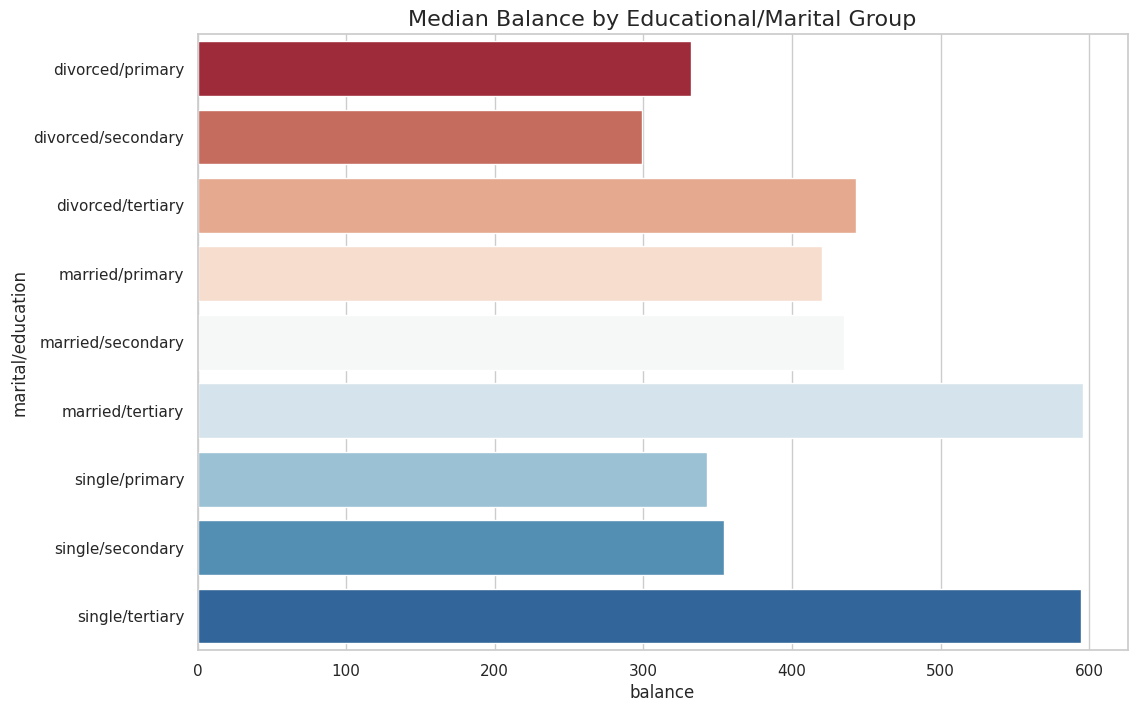

In [44]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))
sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")
plt.title('Median Balance by Educational/Marital Group', fontsize=16)

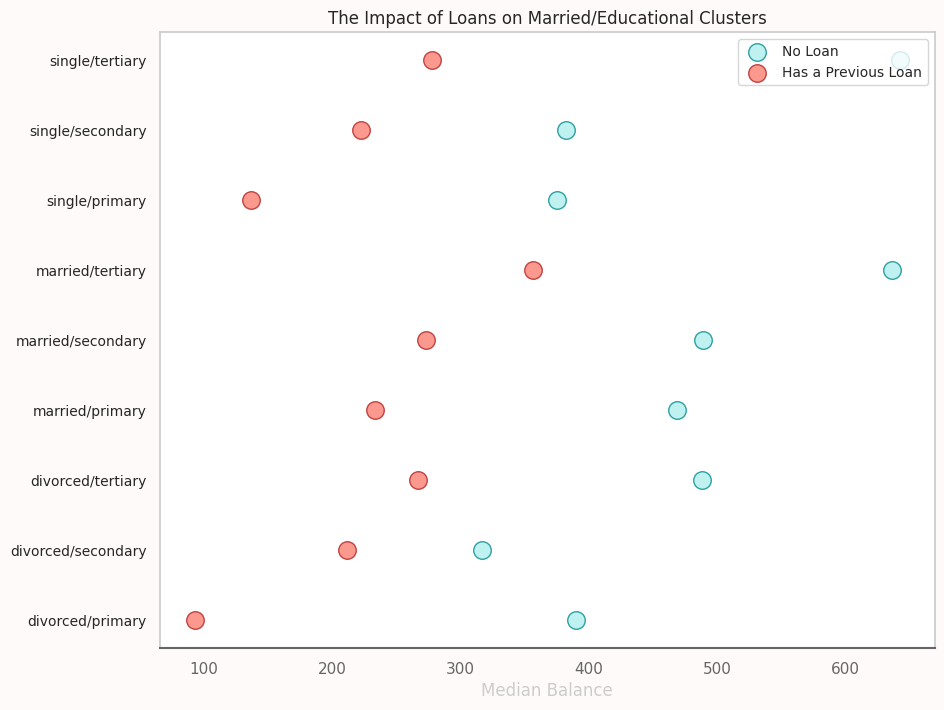

In [45]:
# Let's see the group who had loans from the marital/education group

# Prepare data
loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()
no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values
labels = loan_balance['marital/education'].unique().tolist()
y_pos = np.arange(len(labels))  # Position for labels on y-axis

# Define colors as tuples
no_loan_color = (175/255, 238/255, 238/255)  # RGB to tuple
no_loan_edgecolor = (0/255, 139/255, 139/255)
has_loan_color = (250/255, 128/255, 114/255)
has_loan_edgecolor = (178/255, 34/255, 34/255)

# Plot configuration
plt.figure(figsize=(10, 8))

# Scatter plot for 'No Loan'
plt.scatter(no_loan, y_pos, color=no_loan_color, edgecolor=no_loan_edgecolor, s=160, label='No Loan', alpha=0.8)

# Scatter plot for 'Has a Previous Loan'
plt.scatter(has_loan, y_pos, color=has_loan_color, edgecolor=has_loan_edgecolor, s=160, label='Has a Previous Loan', alpha=0.8)

# Adding labels and title
plt.yticks(y_pos, labels, fontsize=10)
plt.xlabel("Median Balance")
plt.title("The Impact of Loans on Married/Educational Clusters")

# Customize x-axis
plt.gca().spines['bottom'].set_color((102/255, 102/255, 102/255))
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().tick_params(axis='x', colors=(102/255, 102/255, 102/255))
plt.gca().xaxis.label.set_color((204/255, 204/255, 204/255))
plt.grid(False)

# Add legend
plt.legend(loc='upper right', fontsize=10)

# Customize background colors
plt.gca().set_facecolor((255/255, 255/255, 255/255))
plt.gcf().set_facecolor((255/255, 250/255, 250/255))

# Show plot
plt.show()


Campaign Duration:



Campaign Duration: Hmm, we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.



Average Campaign Duration: The average campaign duration is 374.76, let's see if clients that were above this average were more likely to open a term deposit.



Duration Status: People who were above the duration status, were more likely to open a term deposit. 78% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

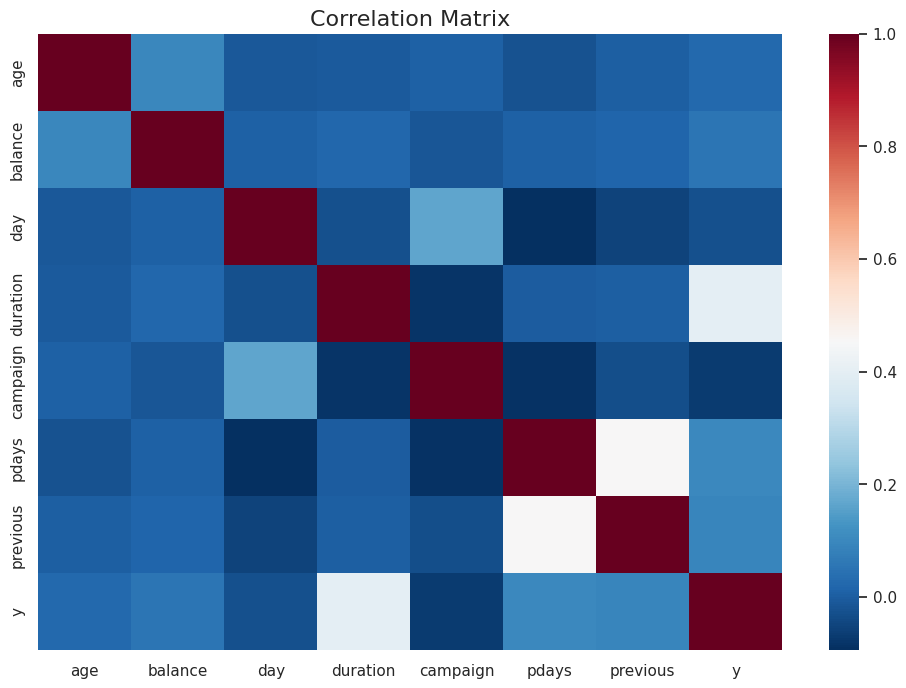

In [46]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical values
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['y'] = LabelEncoder().fit_transform(df['y'])

# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")

# categorical_df = df.select_dtypes(include="object")
corr_numeric = numeric_df.corr()
sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

/tmp/ipykernel_30/314048141.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'below_average' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



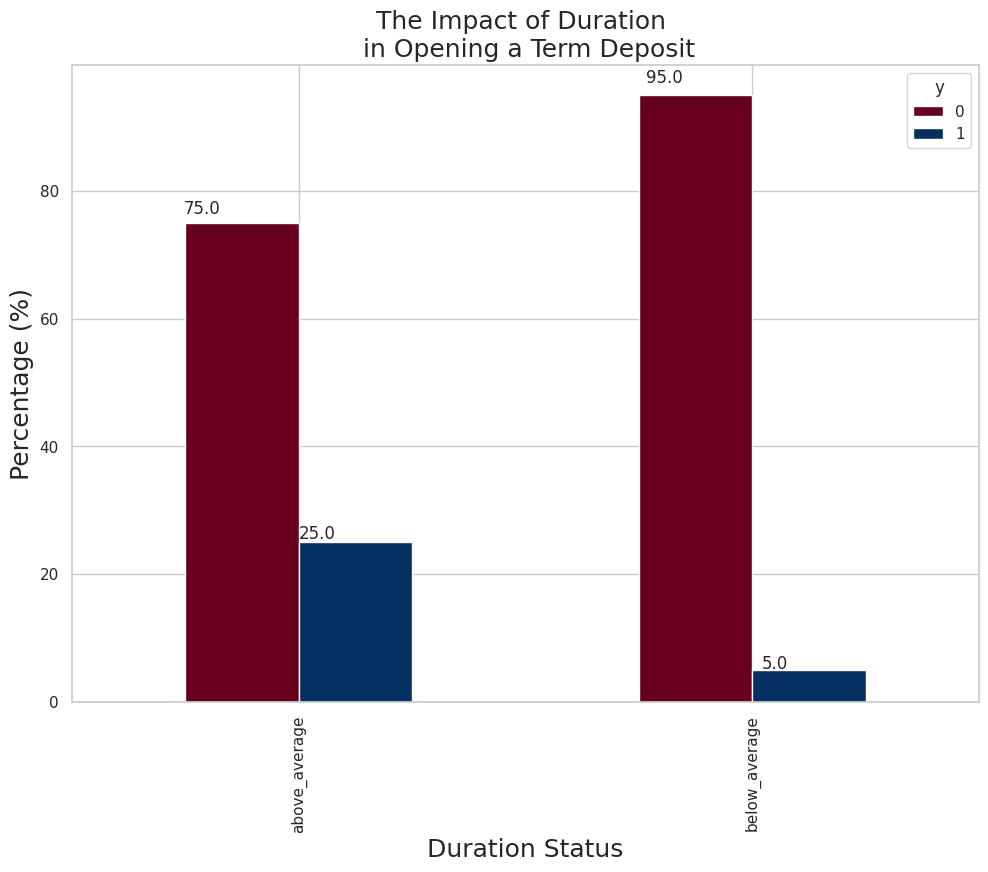

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()
lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')

plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))

plt.show()

Pre Processing:



Outlier Detection

In [48]:
from collections import Counter

def detect_outliers(data,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)

    return multiple_outliers

In [49]:
outlier_indices = detect_outliers(df,['age','day','duration','campaign','previous'])

# Check the outlier indices and print only the valid ones
print("Valid outlier indices:")
valid_outlier_indices = []

for index in outlier_indices:
    if index < len(df):
        valid_outlier_indices.append(index)
        print(index)
    else:
        print(f"Index {index} is out of bounds.")

# Drop rows with valid outlier indices from the DataFrame
df = df.drop(valid_outlier_indices)

# Print the cleaned DataFrame
print("DataFrame after dropping valid outlier indices:")

print(df)


Valid outlier indices:
40363
40957
41610
41754
41842
42061
42325
42419
42558
42607
42730
42891
42996
43142
43158
Index 43423 is out of bounds.
Index 43532 is out of bounds.
Index 43722 is out of bounds.
Index 43731 is out of bounds.
Index 43775 is out of bounds.
Index 43832 is out of bounds.
Index 43893 is out of bounds.
Index 44316 is out of bounds.
Index 44634 is out of bounds.
Index 44746 is out of bounds.
Index 44752 is out of bounds.
Index 44788 is out of bounds.
Index 45208 is out of bounds.
27553
29720
36443
36967
38725
Index 45056 is out of bounds.
DataFrame after dropping valid outlier indices:
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   

Missing values

In [50]:
df.isna().sum()

age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
y                    0
marital/education    0
duration_status      0
dtype: int64

I do not include the Duration column in the dataset, as it is unknown data at the time of the prediction.

In [51]:
df=df.drop(['duration'],axis=1)

One-Hot Encoding

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43334 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                43334 non-null  int64 
 1   job                43334 non-null  object
 2   marital            43334 non-null  object
 3   education          43334 non-null  object
 4   default            43334 non-null  object
 5   balance            43334 non-null  int64 
 6   housing            43334 non-null  object
 7   loan               43334 non-null  object
 8   contact            43334 non-null  object
 9   day                43334 non-null  int64 
 10  month              43334 non-null  object
 11  campaign           43334 non-null  int64 
 12  pdays              43334 non-null  int64 
 13  previous           43334 non-null  int64 
 14  poutcome           43334 non-null  object
 15  y                  43334 non-null  int64 
 16  marital/education  43334 non-null  object
 17

In [53]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

df = pd.get_dummies(df, columns=columns).mul(1)
df.head()

,age,balance,day,campaign,pdays,previous,y,marital/education,duration_status,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1,0,0,married/tertiary,above_average,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,1,-1,0,0,single/secondary,below_average,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,1,-1,0,0,married/secondary,below_average,0,...,0,0,1,0,0,0,0,0,0,1
5,35,231,5,1,-1,0,0,married/tertiary,below_average,0,...,0,0,1,0,0,0,0,0,0,1
6,28,447,5,1,-1,0,0,single/tertiary,below_average,0,...,0,0,1,0,0,0,0,0,0,1


The pdays data indicates how many times the customer has been contacted before.



Updated as follows:



if the pdays = 0, it indicates that it has not been contacted before



if the pdays = 1, it indicates that it was contacted earlier

In [54]:
def pdayswork(pdays):
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)
df['pdays2'] = df['pdays'].apply(pdayswork)

Data Normalization

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43334 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  43334 non-null  int64 
 1   balance              43334 non-null  int64 
 2   day                  43334 non-null  int64 
 3   campaign             43334 non-null  int64 
 4   pdays                43334 non-null  int64 
 5   previous             43334 non-null  int64 
 6   y                    43334 non-null  int64 
 7   marital/education    43334 non-null  object
 8   duration_status      43334 non-null  object
 9   job_admin.           43334 non-null  int64 
 10  job_blue-collar      43334 non-null  int64 
 11  job_entrepreneur     43334 non-null  int64 
 12  job_housemaid        43334 non-null  int64 
 13  job_management       43334 non-null  int64 
 14  job_retired          43334 non-null  int64 
 15  job_self-employed    43334 non-null  int64 
 16  job_servi

In [62]:
df = df.drop(['marital/education','duration_status'], axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:, 0:50]
Y = df.iloc[:, 50]
nd = StandardScaler()
nd.fit(X)
X =nd.transform(X)
print(X)
print(Y)

[[ 1.64110536  0.26207759 -1.30089736 ... -0.20642193 -0.18439697
   0.47254094]
 [ 0.3076159  -0.43904565 -1.30089736 ... -0.20642193 -0.18439697
   0.47254094]
 [-0.74012582 -0.4480004  -1.30089736 ... -0.20642193 -0.18439697
   0.47254094]
 ...
 [ 2.97459482  1.44675698  0.14374529 ... -0.20642193  5.42308257
  -2.11621875]
 [ 1.54585611 -0.22711673  0.14374529 ... -0.20642193 -0.18439697
   0.47254094]
 [-0.35912883  0.53668972  0.14374529 ...  4.84444649 -0.18439697
  -2.11621875]]
0        0
1        0
2        0
5        0
6        0
        ..
45206    0
45207    0
45208    1
45209    0
45210    1
Name: pdays2, Length: 43334, dtype: int64


In [ ]:
Model Building

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

X = df.iloc[:, 0:50]
Y = df.iloc[:, 50]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)


In [66]:
svm_classifier = SVC(random_state=3432, C=0.5)

In [67]:
svm_classifier.fit(X_train, y_train)

SVC(C=0.5, random_state=3432)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Predicting Test Set
y_pred =svm_classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

display(model_results)

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.98477,1.0,0.918063,0.957282


In [72]:
clf = RandomForestClassifier(n_estimators=100, max_depth=12,random_state=50)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
acc = accuracy_score(y_test,prediction)*100
print("Random Forest accuracy:",acc)
f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)

Random Forest accuracy: 100.0
F1-Score:  100.0


In [74]:
knn= KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
prediction=knn.predict(X_test)
acc = accuracy_score(y_test,prediction)*100
print("Knn accuracy:",acc)
f1=f1_score(y_test,prediction)*100
print("F1-Score: ",f1)

Knn accuracy: 99.44617514710973
F1-Score:  98.48771266540642
